In [1]:
# ========================================================
# Breast Cancer Wisconsin Dataset Analysis & Classification
# ========================================================

# 1️⃣ Install Required Libraries
!pip install kagglehub pandas scikit-learn seaborn matplotlib imbalanced-learn
!pip install streamlit


# 2️⃣ Import Libraries
import os
import pandas as pd
import numpy as np
import kagglehub
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns# --------------------------------------------------------


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
  Using cached streamlit-1.51.0-py3-none-any.whl (10.2 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.7/42.7 MB 381.0 kB/s eta 0:00:00m eta 0:00:010:00:03
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.2/208.2 KB 426.6 kB/s eta 0:00:000:00:01m eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 354.7 kB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.2/731.2 KB 292.8 kB/s eta 0:00:000:00:010:00:01:01
  Using cached protobuf-6.33.0-cp39-abi3-manylinux2014_x86_64.whl (323 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 KB 372.5 kB/s eta 0:00:00 kB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 423.1/423.1 KB 454.5 kB/s eta 0:00:001m447.8 kB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 694.3 kB/s eta 0:00:000:00:01 eta 0:00:01
  Attem

In [2]:
# --------------------------------------------------------
# 3️⃣ Download Dataset from Kagglehub
# --------------------------------------------------------
path = kagglehub.dataset_download("uciml/breast-cancer-wisconsin-data")
print("Dataset path:", path)

# Check files in the dataset folder
print("Files available:", os.listdir(path))


Dataset path: /home/hp/.cache/kagglehub/datasets/uciml/breast-cancer-wisconsin-data/versions/2
Files available: ['data.csv']


In [3]:
# --------------------------------------------------------
# 4️⃣ Load CSV into pandas DataFrame
# --------------------------------------------------------
df = pd.read_csv(os.path.join(path, "data.csv"))
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
# --------------------------------------------------------
# 5️⃣ Data Preprocessing
# --------------------------------------------------------
# Drop unnecessary columns
df = df.drop(columns=['id', 'Unnamed: 32'])

# Encode target: M = 1 (Malignant), B = 0 (Benign)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Feature-target split
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Missing values:
 diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [5]:
# --------------------------------------------------------
# 6️⃣ Feature Selection
# --------------------------------------------------------
selector = SelectKBest(score_func=f_classif, k=10)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)

# --------------------------------------------------------
# 7️⃣ Handle Class Imbalance with SMOTE
# --------------------------------------------------------
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_selected, y_train)

print("Original class distribution:\n", y_train.value_counts())
print("Balanced class distribution:\n", pd.Series(y_train_balanced).value_counts())

Selected Features: Index(['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean',
       'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst',
       'concavity_worst', 'concave points_worst'],
      dtype='object')
Original class distribution:
 diagnosis
0    286
1    169
Name: count, dtype: int64
Balanced class distribution:
 diagnosis
0    286
1    286
Name: count, dtype: int64


In [6]:
# --------------------------------------------------------
# 8️⃣ Model Training & Evaluation
# --------------------------------------------------------
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "SVM (RBF Kernel)": SVC(kernel='rbf', probability=True, random_state=42)
}

for name, model in models.items():
    model.fit(X_train_balanced, y_train_balanced)
    y_pred = model.predict(X_test_selected)
    y_prob = model.predict_proba(X_test_selected)[:, 1] if hasattr(model, "predict_proba") else None
    
    print(f"--- {name} (Balanced Training) ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("ROC-AUC:", roc_auc_score(y_test, y_prob) if y_prob is not None else "N/A")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("\n")

--- Random Forest (Balanced Training) ---
Accuracy: 0.9736842105263158
ROC-AUC: 0.996069439895185
Confusion Matrix:
 [[69  2]
 [ 1 42]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98        71
           1       0.95      0.98      0.97        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



--- Logistic Regression (Balanced Training) ---
Accuracy: 0.9736842105263158
ROC-AUC: 0.998689813298395
Confusion Matrix:
 [[69  2]
 [ 1 42]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98        71
           1       0.95      0.98      0.97        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



--- SVM (RBF Ker

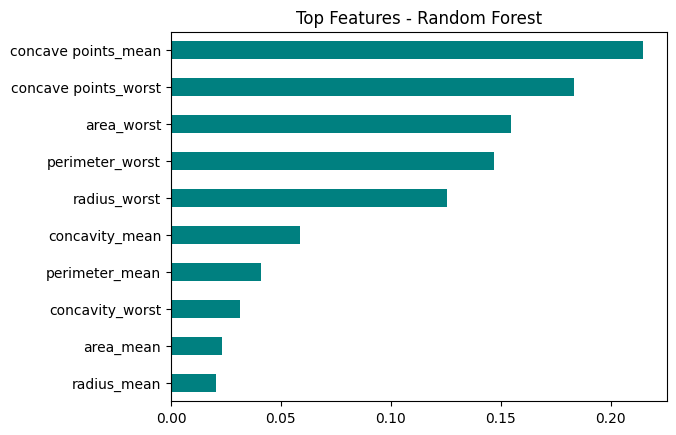

In [7]:
# --------------------------------------------------------
# 9️⃣ Feature Importance (Random Forest)
# --------------------------------------------------------
rf_model = models["Random Forest"]
feat_importances = pd.Series(rf_model.feature_importances_, index=selected_features)
feat_importances.sort_values().plot(kind='barh', color='teal')
plt.title("Top Features - Random Forest")
plt.show()


In [8]:
import joblib

# Save the trained Random Forest model
joblib.dump(rf_model, "breast_cancer_model.pkl")



['breast_cancer_model.pkl']

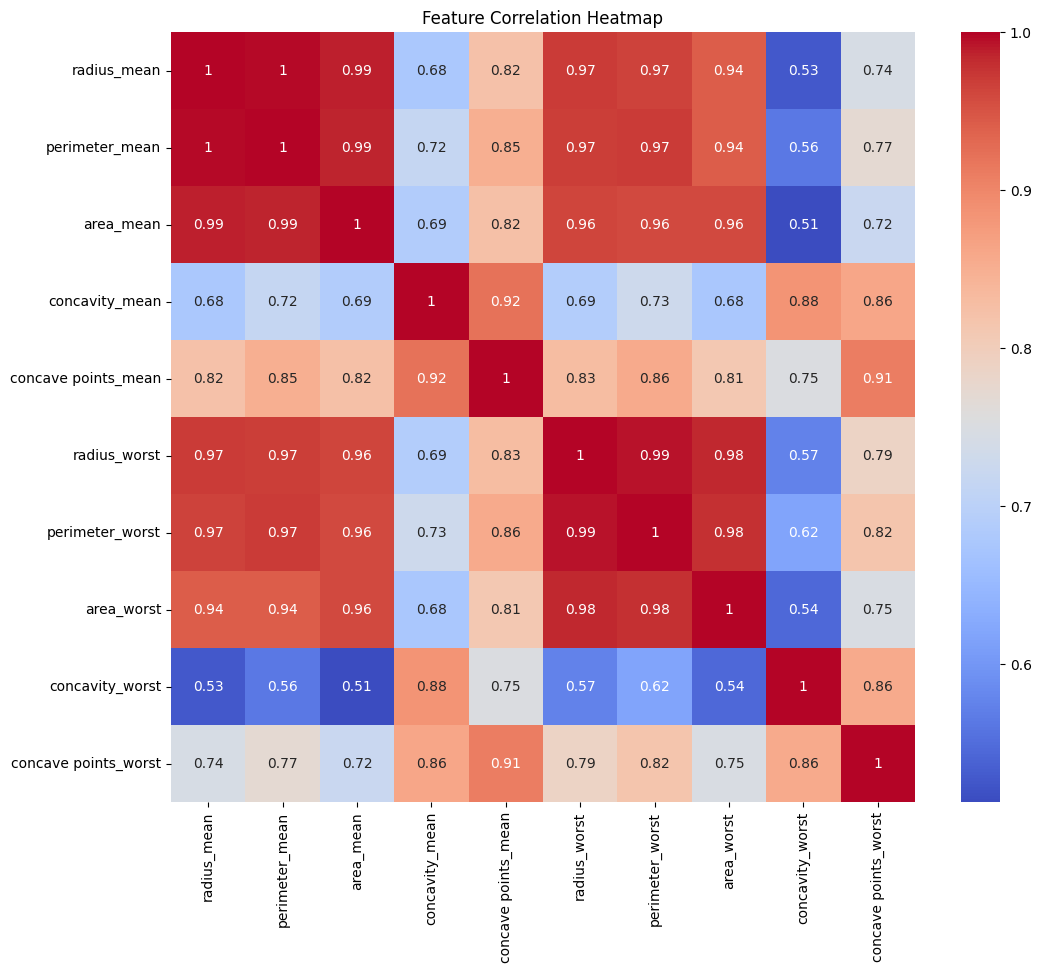

In [9]:
# --------------------------------------------------------
# 🔟 Correlation Heatmap
# --------------------------------------------------------
plt.figure(figsize=(12,10))
sns.heatmap(df[selected_features].corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


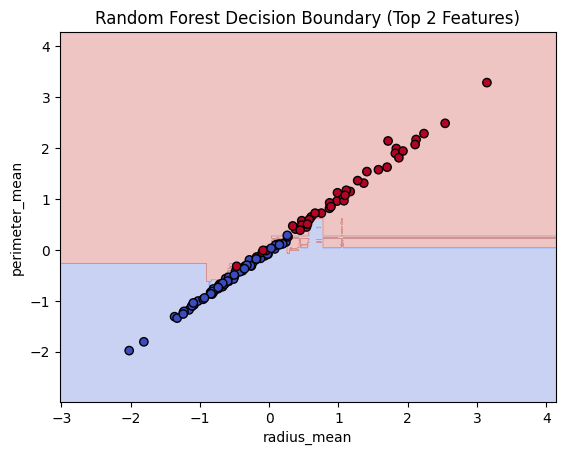

In [10]:

# --------------------------------------------------------
# 1️⃣1️⃣ Decision Boundary Visualization (Top 2 Features)
# --------------------------------------------------------
top2_features = selected_features[:2]
X_train_2f = X_train_balanced[:, :2]
X_test_2f = X_test_selected[:, :2]

def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolor='k')
    plt.xlabel(top2_features[0])
    plt.ylabel(top2_features[1])
    plt.title(title)
    plt.show()

# Train Random Forest on top 2 features for visualization
rf_2f = RandomForestClassifier(n_estimators=100, random_state=42)
rf_2f.fit(X_train_2f, y_train_balanced)

plot_decision_boundary(rf_2f, X_test_2f, y_test.values, "Random Forest Decision Boundary (Top 2 Features)")

In [12]:
streamlit run app.py


SyntaxError: invalid syntax (507122745.py, line 1)